<a href="https://colab.research.google.com/github/AadityaAdh/k_means_clustering/blob/main/k_means_clustering_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k means clustering of football data

csv file from this link:https://www.kaggle.com/datasets/stefanoleone992/fifa-22-complete-player-dataset


use players_22.csv file

In [147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dataframe=pd.read_csv('/content/players_22.csv')

<ipython-input-2-a0dcb60d3317>:1: DtypeWarning: Columns (25,108) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframe=pd.read_csv('/content/players_22.csv')


In [ ]:
dataframe.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [ ]:
dataframe.describe()

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


In [ ]:
dataframe.columns

Index(['sofifa_id', 'player_url', 'short_name', 'long_name',
       'player_positions', 'overall', 'potential', 'value_eur', 'wage_eur',
       'age',
       ...
       'lcb', 'cb', 'rcb', 'rb', 'gk', 'player_face_url', 'club_logo_url',
       'club_flag_url', 'nation_logo_url', 'nation_flag_url'],
      dtype='object', length=110)

In [ ]:
list(dataframe.columns)

['sofifa_id',
 'player_url',
 'short_name',
 'long_name',
 'player_positions',
 'overall',
 'potential',
 'value_eur',
 'wage_eur',
 'age',
 'dob',
 'height_cm',
 'weight_kg',
 'club_team_id',
 'club_name',
 'league_name',
 'league_level',
 'club_position',
 'club_jersey_number',
 'club_loaned_from',
 'club_joined',
 'club_contract_valid_until',
 'nationality_id',
 'nationality_name',
 'nation_team_id',
 'nation_position',
 'nation_jersey_number',
 'preferred_foot',
 'weak_foot',
 'skill_moves',
 'international_reputation',
 'work_rate',
 'body_type',
 'real_face',
 'release_clause_eur',
 'player_tags',
 'player_traits',
 'pace',
 'shooting',
 'passing',
 'dribbling',
 'defending',
 'physic',
 'attacking_crossing',
 'attacking_finishing',
 'attacking_heading_accuracy',
 'attacking_short_passing',
 'attacking_volleys',
 'skill_dribbling',
 'skill_curve',
 'skill_fk_accuracy',
 'skill_long_passing',
 'skill_ball_control',
 'movement_acceleration',
 'movement_sprint_speed',
 'movement_agi

In [ ]:
columns_list=list(dataframe.columns)

In [ ]:
columns_list[0]

'sofifa_id'

In [ ]:
dataframe[columns_list]

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,261962,https://sofifa.com/player/261962/defu-song/220002,Song Defu,宋德福,CDM,47,52,70000.0,1000.0,22,...,46+2,46+2,46+2,48+2,15+2,https://cdn.sofifa.net/players/261/962/22_120.png,https://cdn.sofifa.net/teams/112541/60.png,https://cdn.sofifa.net/flags/cn.png,NaN,https://cdn.sofifa.net/flags/cn.png
19235,262040,https://sofifa.com/player/262040/caoimhin-port...,C. Porter,Caoimhin Porter,CM,47,59,110000.0,500.0,19,...,44+2,44+2,44+2,48+2,14+2,https://cdn.sofifa.net/players/262/040/22_120.png,https://cdn.sofifa.net/teams/445/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19236,262760,https://sofifa.com/player/262760/nathan-logue/...,N. Logue,Nathan Logue-Cunningham,CM,47,55,100000.0,500.0,21,...,45+2,45+2,45+2,47+2,12+2,https://cdn.sofifa.net/players/262/760/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png
19237,262820,https://sofifa.com/player/262820/luke-rudden/2...,L. Rudden,Luke Rudden,ST,47,60,110000.0,500.0,19,...,26+2,26+2,26+2,32+2,15+2,https://cdn.sofifa.net/players/262/820/22_120.png,https://cdn.sofifa.net/teams/111131/60.png,https://cdn.sofifa.net/flags/ie.png,NaN,https://cdn.sofifa.net/flags/ie.png


In [ ]:
#vanae xi dataframe index garda df[yaa pani list nai hunu pardo raixa]
#comman practise use garni vanae ko columns_list[i] garda hunxa
dataframe[columns_list[0]]

,sofifa_id
0,158023
1,188545
2,20801
3,190871
4,192985
...,...
19234,261962
19235,262040
19236,262760
19237,262820


In [ ]:
dataframe['short_name'].unique()

array(['L. Messi', 'R. Lewandowski', 'Cristiano Ronaldo', ..., 'N. Logue',
       'L. Rudden', 'E. Lalchhanchhuaha'], dtype=object)

In [ ]:
type(dataframe['short_name'])

pandas.core.series.Series

In [ ]:
type(dataframe[['short_name']])

pandas.core.frame.DataFrame

In [ ]:
dataframe['short_name','overall']

KeyError: ('short_name', 'overall')

In [ ]:
#so single bracket gives series and double givs dataframe
#unique cannot be done in dataframe

In [ ]:
dataframe['short_name']

,short_name
0,L. Messi
1,R. Lewandowski
2,Cristiano Ronaldo
3,Neymar Jr
4,K. De Bruyne
...,...
19234,Song Defu
19235,C. Porter
19236,N. Logue
19237,L. Rudden


In [ ]:
dataframe['short_name'].unique()

array(['L. Messi', 'R. Lewandowski', 'Cristiano Ronaldo', ..., 'N. Logue',
       'L. Rudden', 'E. Lalchhanchhuaha'], dtype=object)

In [ ]:
'''
diffn of axis=0 vs axis=1

Exactly! When you use `axis=0` in pandas, you are working with different rows within the same column. Here's how it breaks down:

- **Axis=0**: Operates **down the rows** of each column.
  - For example, when summing with `axis=0`, pandas will add up all the values in each column by considering the different rows in that column.

### **Example:**

Consider this DataFrame:

```
   A  B  C
0  1  4  7
1  2  5  8
2  3  6  9
```

- **Sum with `axis=0`**:
  ```python
  df.sum(axis=0)
  ```
  This will sum the values for each column, considering all rows in that column:

  ```
  A     6  (1 + 2 + 3)
  B    15  (4 + 5 + 6)
  C    24  (7 + 8 + 9)
  ```

So, **`axis=0`** is indeed working with the different rows of the same column to perform the operation.



'''

"\ndiffn of axis=0 vs axis=1\n\nExactly! When you use `axis=0` in pandas, you are working with different rows within the same column. Here's how it breaks down:\n\n- **Axis=0**: Operates **down the rows** of each column.\n  - For example, when summing with `axis=0`, pandas will add up all the values in each column by considering the different rows in that column.\n\n### **Example:**\n\nConsider this DataFrame:\n\n```\n   A  B  C\n0  1  4  7\n1  2  5  8\n2  3  6  9\n```\n\n- **Sum with `axis=0`**:\n  ```python\n  df.sum(axis=0)\n  ```\n  This will sum the values for each column, considering all rows in that column:\n\n  ```\n  A     6  (1 + 2 + 3)\n  B    15  (4 + 5 + 6)\n  C    24  (7 + 8 + 9)\n  ```\n\nSo, **`axis=0`** is indeed working with the different rows of the same column to perform the operation.\n\n\n\n"

In [ ]:
c = {
    'k': [1, None],
    'b': [3, 5]
}

# Create a DataFrame using the correct method
test = pd.DataFrame(c)

type(test)

pandas.core.frame.DataFrame

In [ ]:
test

,k,b
0,1.0,3
1,NaN,5


In [ ]:
test.dropna(axis=0)

,k,b
0,1.0,3


In [ ]:
'''
Explanation: axis=0 means we're looking down each column to find rows with NaN. If a row has any NaN, that row is removed.

Explanation: For dropna(axis=0), pandas examines each row in each column. If any cell in a row has a NaN value, that entire row is removed from the DataFrame.


vanae ko different row herxa of same column

yedi kunai na vetyo vanae tyo row ma purai row nai delete hunxa

'''

"\nExplanation: axis=0 means we're looking down each column to find rows with NaN. If a row has any NaN, that row is removed.\n\nExplanation: For dropna(axis=0), pandas examines each row in each column. If any cell in a row has a NaN value, that entire row is removed from the DataFrame.\n\n\nvanae ko different row herxa of same column\n\nyedi kunai na vetyo vanae tyo row ma purai row nai delete hunxa\n\n"

In [ ]:
features=['overall','potential','wage_eur','value_eur','age']

In [ ]:
req_df=dataframe[features]

In [ ]:
  req_df

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Cleaning

In [ ]:
req_df=req_df.dropna(axis=0)

In [ ]:
req_df

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


# Scaling data

preprocessing of data

In [93]:
data=req_df.copy()

In [94]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [ ]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,1.916500e+04,19165.000000
mean,65.760188,71.079990,9021.721889,2.850452e+06,25.190034
std,6.882803,6.087721,19476.005074,7.613700e+06,4.727515
min,47.000000,49.000000,500.000000,9.000000e+03,16.000000
25%,61.000000,67.000000,1000.000000,4.750000e+05,21.000000
50%,66.000000,71.000000,3000.000000,9.750000e+05,25.000000
75%,70.000000,75.000000,8000.000000,2.000000e+06,29.000000
max,93.000000,95.000000,350000.000000,1.940000e+08,43.000000


In [ ]:
overall_min=data['overall'].min()

In [ ]:
overall_max=data['overall'].max()

In [ ]:
#data['overall']=(data['overall']-overall_min)/(overall_max-overall_min)

In [ ]:
data

,overall,potential,wage_eur,value_eur,age
0,93,93,320000.0,78000000.0,34
1,92,92,270000.0,119500000.0,32
2,91,91,270000.0,45000000.0,36
3,91,91,270000.0,129000000.0,29
4,91,91,350000.0,125500000.0,30
...,...,...,...,...,...
19234,47,52,1000.0,70000.0,22
19235,47,59,500.0,110000.0,19
19236,47,55,500.0,100000.0,21
19237,47,60,500.0,110000.0,19


In [95]:
for columns in data.columns:
  #print(columns)
  my_min=data[columns].min()
  my_max=data[columns].max()
  data[columns]=(data[columns]-my_min)/(my_max-my_min)

In [96]:
data

,overall,potential,wage_eur,value_eur,age
0,1.000000,0.956522,0.914163,0.402034,0.666667
1,0.978261,0.934783,0.771102,0.615962,0.592593
2,0.956522,0.913043,0.771102,0.231923,0.740741
3,0.956522,0.913043,0.771102,0.664933,0.481481
4,0.956522,0.913043,1.000000,0.646891,0.518519
...,...,...,...,...,...
19234,0.000000,0.065217,0.001431,0.000314,0.222222
19235,0.000000,0.217391,0.000000,0.000521,0.111111
19236,0.000000,0.130435,0.000000,0.000469,0.185185
19237,0.000000,0.239130,0.000000,0.000521,0.111111


In [ ]:
data.describe()

,overall,potential,wage_eur,value_eur,age
count,19165.000000,19165.000000,19165.000000,19165.000000,19165.000000
mean,0.407830,0.480000,0.024383,0.014647,0.340372
std,0.149626,0.132342,0.055725,0.039248,0.175093
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.304348,0.391304,0.001431,0.002402,0.185185
50%,0.413043,0.478261,0.007153,0.004980,0.333333
75%,0.500000,0.565217,0.021459,0.010263,0.481481
max,1.000000,1.000000,1.000000,1.000000,1.000000


# defining centroids

here k means the no of centroid or clusters you want


In [97]:
def givecentroids(dataframes,k):
  t=dataframes.copy()
  no_rows,_=t.shape
  random_index=np.random.randint(0,no_rows,size=k)
  re=t.iloc[random_index,:]
  return re

In [122]:
centroids=givecentroids(data,5)
centroids

,overall,potential,wage_eur,value_eur,age
13182,0.347826,0.521739,0.012876,0.005624,0.222222
8420,0.434783,0.521739,0.010014,0.006655,0.222222
5297,0.500000,0.652174,0.010014,0.018511,0.185185
2239,0.586957,0.543478,0.030043,0.020573,0.518519
2074,0.586957,0.543478,0.030043,0.015934,0.555556


In [ ]:
centroids.iloc[0].values-centroids.iloc[0].values**2

array([0.24810964, 0.23298677, 0.00427343, 0.01518052, 0.2085048 ])

In [98]:

def cal_dist(odf,cdf):
  no_rows_cdf,_=cdf.shape
  no_rows_odf,_=odf.shape
  dictn={0:[],1:[],2:[],3:[],4:[],"closest":[]}
  for i in range(no_rows_odf):
    for j in range(no_rows_cdf):
      dist_arr=cdf.iloc[j].values-odf.iloc[i].values
      dist_arr=dist_arr**2
      dist=dist_arr.sum()
      dictn[j].append(dist)

    nearest=np.argmin([dictn[0][i],dictn[1][i],dictn[2][i],dictn[3][i],dictn[4][i]])

    dictn["closest"].append(nearest)


  dataf=pd.DataFrame(dictn)



  return dataf











In [123]:
dist_table=cal_dist(data,centroids)
dist_table

,0,1,2,3,4,closest
0,1.781358,1.679847,1.539027,1.290339,1.284297,4
1,1.652646,1.553656,1.410783,1.215380,1.216811,3
2,1.418609,1.324192,1.209905,0.916376,0.903270,4
3,1.600440,1.505130,1.361371,1.238896,1.249012,3
4,1.997059,1.903096,1.762509,1.606248,1.613452,3
...,...,...,...,...,...,...
19160,0.329554,0.397562,0.596295,0.662272,0.685425,0
19161,0.226148,0.294147,0.444947,0.618136,0.649522,0
19162,0.275666,0.343665,0.522638,0.627541,0.653439,0
19163,0.213388,0.281387,0.426516,0.604431,0.635817,0


#updating cluster centroids

In [142]:
def update_centroids(codf,odf,cdf):
  data_centroid_0 = odf.loc[(odf["closest"] == 0)]
  #print(data_centroid_0)
  data_centroid_0=data_centroid_0.iloc[:,:-1]
  data_centroid_1 = odf[odf["closest"] == 1]
  data_centroid_1=data_centroid_1.iloc[:,:-1]

  data_centroid_2 = odf[odf["closest"] == 2]
  data_centroid_2=data_centroid_2.iloc[:,:-1]
  data_centroid_3 = odf[odf["closest"] == 3]
  data_centroid_3=data_centroid_3.iloc[:,:-1]
  data_centroid_4 = odf[odf["closest"] == 4]
  data_centroid_4=data_centroid_4.iloc[:,:-1]
  column_names = cdf.columns
  arr=[]


  #print(data_centroid_4)
  arr.append(codf.iloc[list(data_centroid_0.index),:].mean().values)
  arr.append(codf.iloc[list(data_centroid_1.index),:].mean().values)
  arr.append(codf.iloc[list(data_centroid_2.index),:].mean().values)
  arr.append(codf.iloc[list(data_centroid_3.index),:].mean().values)
  arr.append(codf.iloc[list(data_centroid_4.index),:].mean().values)
  dfr=pd.DataFrame(arr,columns=column_names)

  return dfr


In [143]:
update_centroids(data,dist_table,centroids)

,overall,potential,wage_eur,value_eur,age
0,0.265846,0.417967,0.003535,0.002733,0.224113
1,0.439194,0.489638,0.012564,0.007988,0.307805
2,0.532810,0.682826,0.052269,0.042841,0.213223
3,0.531504,0.499778,0.054259,0.029564,0.456603
4,0.483972,0.440494,0.030179,0.010629,0.631737


#now looping until we get the same cluster

In [148]:
status=False
count=0
while not status:
  dt1=cal_dist(data,centroids)
  centroids=update_centroids(data,dt1,centroids)
  #print(centroids)
  dt2=cal_dist(data,centroids)
  #print(dt2)
  count+=1
  print(f'epoch: {count}')

  if(np.array_equal(dt1["closest"].values,dt2["closest"].values)):
    status=True



epoch: 1
epoch: 2
epoch: 3
epoch: 4
epoch: 5
epoch: 6
epoch: 7
epoch: 8
epoch: 9
epoch: 10
epoch: 11
epoch: 12
epoch: 13
epoch: 14
epoch: 15
epoch: 16
epoch: 17
epoch: 18
epoch: 19
epoch: 20
epoch: 21
epoch: 22
epoch: 23
epoch: 24
epoch: 25
epoch: 26
epoch: 27
epoch: 28


#now lets plot the clusters

In [150]:
dt2

,0,1,2,3,4,closest
0,2.136080,1.826386,1.614611,0.944710,1.407836,3
1,1.987048,1.722107,1.492635,0.856369,1.338204,3
2,1.758944,1.412946,1.264047,0.673298,1.011896,3
3,1.911806,1.711961,1.448834,0.849953,1.366761,3
4,2.317687,2.095345,1.842987,1.179712,1.730545,3
...,...,...,...,...,...,...
19160,0.183355,0.252801,0.441915,0.911438,0.555786,0
19161,0.094904,0.253894,0.328065,0.787617,0.541345,0
19162,0.137165,0.238995,0.383260,0.845845,0.532849,0
19163,0.086244,0.249027,0.313368,0.767161,0.530481,0


### 2 oota kunai points linxu aani plot garxu

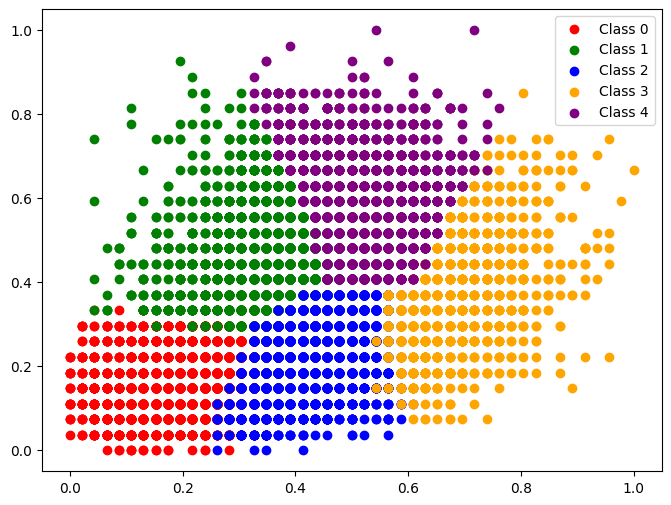

In [160]:
colors = ['red', 'green', 'blue', 'orange', 'purple']
plt.figure(figsize=(8, 6))
for i in range(5):
  to_plot=dt2[dt2["closest"]==i]
  to_plot_index=list(to_plot.index)
  plt.scatter(data.iloc[to_plot_index, 0], data.iloc[to_plot_index, 4], color=colors[i], label=f'Class {i}')

plt.legend()
plt.show()

#checking with sklearn

In [161]:
from sklearn.cluster import KMeans
import pandas as pd

In [163]:
# Initialize KMeans with the desired number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Fit the model
kmeans.fit(data)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5, random_state=42)

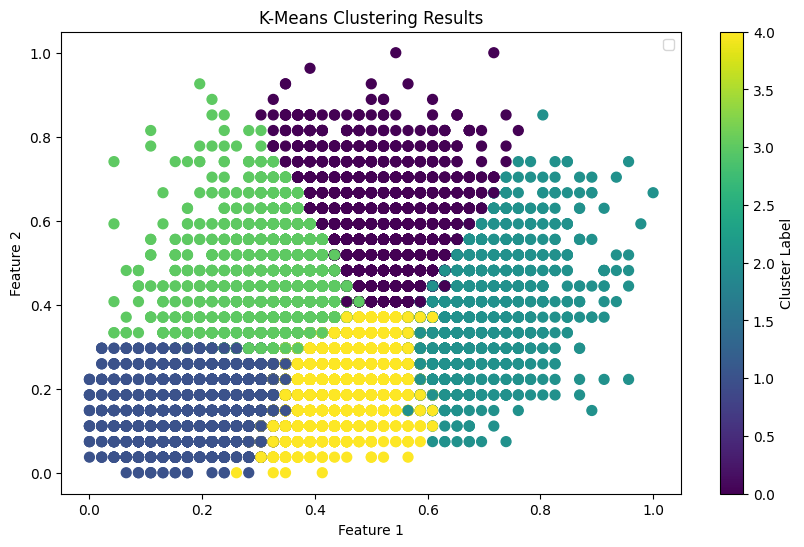

In [167]:
labels = kmeans.labels_

# Coordinates of cluster centers
cluster_centers = kmeans.cluster_centers_

# Plot data points
plt.figure(figsize=(10, 6))
scatter = plt.scatter(data.iloc[:, 0], data.iloc[:, 4], c=labels, cmap='viridis', marker='o', s=50)



# Add labels and title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('K-Means Clustering Results')
plt.legend()

# Show plot
plt.colorbar(scatter, label='Cluster Label')
plt.show()

#so we get nearly similar cluster as sklearn

# Rough

In [135]:
k=dist_table[dist_table["closest"] == 2].iloc[:,:-1]
k

,0,1,2,3,4
6,2.002476,1.905820,1.712228,1.784698,1.817127
21,0.971276,0.881009,0.713536,0.799454,0.828319
29,1.074535,0.987857,0.815532,0.954231,0.989444
43,1.164859,1.083791,0.933147,0.961056,0.984435
44,0.953648,0.871656,0.716197,0.800483,0.829085
...,...,...,...,...,...
15085,0.066597,0.081657,0.062412,0.336007,0.372917
15555,0.076996,0.095839,0.073780,0.355885,0.392787
15778,0.073496,0.092379,0.067386,0.329239,0.363399
16232,0.104374,0.126998,0.099366,0.414670,0.454313


In [137]:
list(k.index)

[6,
 21,
 29,
 43,
 44,
 45,
 46,
 91,
 92,
 93,
 94,
 95,
 96,
 127,
 129,
 132,
 133,
 136,
 137,
 138,
 139,
 174,
 175,
 179,
 180,
 184,
 185,
 187,
 189,
 190,
 191,
 192,
 194,
 195,
 196,
 197,
 238,
 243,
 251,
 252,
 253,
 254,
 255,
 256,
 257,
 258,
 259,
 260,
 262,
 263,
 266,
 267,
 268,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 278,
 279,
 280,
 282,
 343,
 352,
 353,
 356,
 357,
 358,
 360,
 361,
 364,
 367,
 369,
 372,
 373,
 374,
 375,
 376,
 378,
 379,
 380,
 381,
 382,
 383,
 384,
 385,
 386,
 450,
 462,
 463,
 466,
 469,
 470,
 471,
 472,
 473,
 475,
 477,
 478,
 479,
 480,
 481,
 484,
 486,
 487,
 488,
 489,
 490,
 491,
 492,
 494,
 495,
 496,
 497,
 498,
 499,
 500,
 501,
 502,
 503,
 504,
 506,
 594,
 596,
 601,
 603,
 604,
 605,
 611,
 612,
 614,
 615,
 617,
 618,
 619,
 620,
 622,
 623,
 626,
 628,
 629,
 630,
 631,
 632,
 633,
 634,
 636,
 637,
 638,
 639,
 640,
 641,
 642,
 643,
 644,
 646,
 647,
 649,
 650,
 651,
 653,
 654,
 655,
 656,
 657,
 658,
 659,


In [139]:
k.iloc[[1,2],:]

,0,1,2,3,4
21,0.971276,0.881009,0.713536,0.799454,0.828319
29,1.074535,0.987857,0.815532,0.954231,0.989444
